## Capstone Project: Image Classification

In [1]:
# Importing modules
import keras
import tensorflow as tf 

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

print (tf.__version__) # to check `tf` version
physical_devices = tf.config.list_physical_devices('GPU') # to check whether it's using GPU or not
print("Num GPUs:", len(physical_devices))

2.7.0
Num GPUs: 0


### What is computer vision?
Computer Vision is a subfield of [Deep Learning](https://github.com/letspython3x/Books/blob/master/Deep%20Learning%20with%20Python.pdf) and Artificial Intelligence, also refer [here](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/66)  where humans teach computers to see and interpret the world around them.


Image Classification is one of the most fundamental tasks in computer vision. It has revolutionized and propelled technological advancements in the most prominent fields, including the automobile industry, healthcare, manufacturing, and more.

How does image classification work?
Image Classification (often referred to as Image Recognition) is the task of associating one (single-label classification) or more (multi-label classification) labels to a given image.

### Basic steps in computer vision:


### Input Data:
   - Loading images or videos (image frames)
   
### Preprocessing: 

   - Normalization, rescaling pixels/resizing, color transformation, one Hot encoding etc
    
### Feature Extraction: 
   - Finding unique characteristic/features of an image
    
### Modeling
   - Learn from the extracted features to predict and classify object

**DEFINITIONS** <br>
>`An image classifier is an algorithm that takes in an image as input and outputs a label or “class” that identifies that image. A class (also called a category) in machine learning is the output category of your data.` <br>
Here is how the image flows through the classification pipeline: <br>
1. A computer receives visual input from an imaging device like a camera. This input is typically captured as an image or a sequence of images forming a video.<br>
2. Each image is then sent through some preprocessing steps whose purpose is to standardize the images. Common preprocessing steps include resizing an image, blurring, rotating, changing its shape, or transforming the image from one color to another, such as from color to grayscale. Only by standardizing the images--for example, making them the same size--can you then compare them and further analyze them.
3. We extract features. Features are what help us define objects, and they are usually information about object shape or color. For example, some features that distinguish a motorcycle are the shape of the wheels, headlights, mudguards, and so on. The output of this process is a feature vector that is a list of unique shapes that identify the object.
4. The features are fed into a classification model. This step looks at the feature vector from the previous step and predicts the class of the image. Pretend that you are the classifier model for a few minutes, and let’s go through the classification process. You look at the list of features in the feature vector one by one and try to determine what’s in the image:
     1. First you see a wheel feature; could this be a car, a motorcycle, or a dog? Clearly it is not a dog, because dogs don’t have wheels (at least, normal dogs, not robots). Then this could be an image of a car or a motorcycle.
     2. You move on to the next feature, the headlights. There is a higher probability that this is a motorcycle than a car.
     3. The next feature is rear mudguards --again, there is a higher probability that it is a motorcycle.
     4. The object has only two wheels; this is closer to a motorcycle.
     5. And you keep going through all the features like the body shape, pedal, and so on, until you arrive at a best guess of the object in the image.

source: [here](https://github.com/moelgendy/deep_learning_for_vision_systems)

# 1. Input Data

## How Computers "See" images?
When we look at an image, we see objects, landscape, colors, and so on. But that’s not the case with computers.images are just a 2D arrays of numbers of pixels (for grayscalepictures); where a pixel is simply a number represented by a range of either zero to one or in 0 to 255.
<div>
<img src="images/cv1.png" width="600"/>
</div>
Fig.1:

>In grayscale images, each pixel represents the intensity of only one color, whereas in the standard RGB system, color images have three channels (red, green, and blue). In other words, color images are represented by three matrices: one represents the intensity of red in the pixel, one represents green, and one represents blue ([source](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/125)). <br>
<div>
<img src="images/cv2.png" width="600"/>
</div>
<br>

Fig.2:

>As you can see in figure above, the color image is composed of three channels: red, green, and blue. Now the question is, how do computers see this image? Again, they see the matrix, unlike grayscale images, where we had only one channel. In this case, we will have three matrices stacked on top of each other; that’s why it’s a 3D matrix. The dimensionality of 700 × 700 color images is (700, 700, 3). Let’s say the first matrix represents the red channel; then each element of that matrix represents an intensity of red color in that pixel, and likewise with green and blue. Each pixel in a color image has three numbers (0 to 255) associated with it. These numbers represent intensity of red, green, and blue color in that particular pixel. <br>
If we take the pixel $F(0,0)$ as an example, we will see that it represents the top-left pixel of the image of green grass. When we view this pixel in the color images, it looks like figure below which shows some shades of the color green and their RGB values ([source](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/)). 
<div>
    <img src="images/cv3.png" width="300"/>
</div>

Fig.3: <br>
[Source for fig.1 - fig.3](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/)
- By `RGB` color cobination formula: 
`R = 11, G = 102, and B = 35` is a `Forest green` color hence the top left corner of Fig.2.

-- Now let's load the `CIFAR-10 Dataset` and implement what we've talked about so far.

In [2]:
# loadin dataset
from keras.datasets import cifar10

### Data: The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.<br>Here are the classes in the dataset, as well as 10 random images from each:

![Classes of Images](images/classes.png) Fig.4 [source](https://www.cs.toronto.edu/~kriz/cifar.html)

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 2. Preprocessing
- Normalization, standardization, one Hot encoding etc <br>
Any adjustments that you need to apply to your dataset are part of preprocessing.The good news is that, unlike traditional machine learning, DL algorithms require minimum data preprocessing because neural networks do most of the heavy lifting in processing an image and extracting features.<br>
- Image processing could involve simple tasks like image resizing. In order to feed a dataset of images to a convolutional network, the images all have to be the same size.
- Converting color images to grayscale to reduce computation complexity
    >Sometimes you will find it useful to remove unnecessary information from your images to reduce space or computational complexity. For example, suppose you want to convert your colored images to grayscale, because for many objects, color is not necessary to recognize and interpret an image. Grayscale can be good enough for recognizing certain objects. Since color images contain more information than black-and-white images, they can add unnecessary complexity and take up more space in memory. Remember that color images are represented in three channels, which means that converting them to grayscale will reduce the number of pixels that need to be processed .
    In this project, you can see how patterns of brightness and darkness (intensity) can be used to define the shape and characteristics of many objects. However, in other applications, color is important to define certain objects, like skin cancer detection, which relies heavily on skin color (red rashes). <br> Another example of the importance of color in images is lane-detection applications in a self-driving car, where the car has to identify the difference between yellow and white lines, because they are treated differently. Grayscale images do not provide enough information to distinguish between the yellow and white lines. <br>
The rule of thumb to identify the importance of colors in your problem is to look at the image with the human eye. If you are able to identify the object you are looking for in a gray image, then you probably have enough information to feed to your model. If not, then you definitely need more information (colors) for your model. <br>
> You must make certain assumptions about the dataset and the problem you are trying to solve. For some datasets, it is best to convert the colored images to grayscale, while for other datasets, you might need to keep or adjust the color images.

<div>
    <img src="images/cv4.png" width="300"/>
</div>

Fig.5.[source](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/143)

- Standardizing images: images must be preprocessed and scaled to have identical widths and heights before being fed to the learning algorithm.

- Data augmentation --Another common preprocessing technique involves augmenting the existing dataset with modified versions of the existing images. Scaling, rotations, and other affine transformations are typically used to enlarge your dataset and expose the neural network to a wide variety of variations of your images. This makes it more likely that your model will recognize objects when they appear in any form and shape.

<div>
<img src="images/cnn16.png" width="600"/>
</div>

Fig.6. [source](https://www.kaggle.com/kedarsai/cifar-10-88-accuracy-using-keras)<br>
>See from just one image we now genearated 6 images just by changing the inclanation of the subject. Ofcourse it might looks same image for our eyes but for machine it is a different image, since the pixel values changes. We can play with color of the image, focus of the image, shift of the image etc. Image augmentation really helps machine to understand that a cat is a cat, irrespective of the color or image position. <br>
To augmet the data we are using the ImageDataGenerator of tensorflow keras preprocessing library.


In [4]:
# loading the data in train/test format

(X_train1, y_train1), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train1.dtype

dtype('uint8')

- `Unsigned Integers of 8 bits. A uint8 data type contains all whole numbers from 0 to 255. As with all unsigned numbers, the values must be non-negative. Uint8's are mostly used in graphics (colors are always non-negative)` ([source](https://www.cs.utah.edu/~germain/PPS/Topics/Matlab/uint8.html)).

In [6]:
# setting train, validation and test datasets
X_train = X_train1[:30000]
y_train = y_train1[:30000] # adopted from: https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb
X_valid = X_train1[30000:]
y_valid = y_train1[30000:]

In [7]:
print('Training set: ', X_train.shape, y_train.shape)
print('Validation set: ',  X_valid.shape, y_valid.shape)
print('Test set: ', X_test.shape, y_test.shape)

Training set:  (30000, 32, 32, 3) (30000, 1)
Validation set:  (20000, 32, 32, 3) (20000, 1)
Test set:  (10000, 32, 32, 3) (10000, 1)


* 32X32 and 3 channeles of images with 10 categories

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

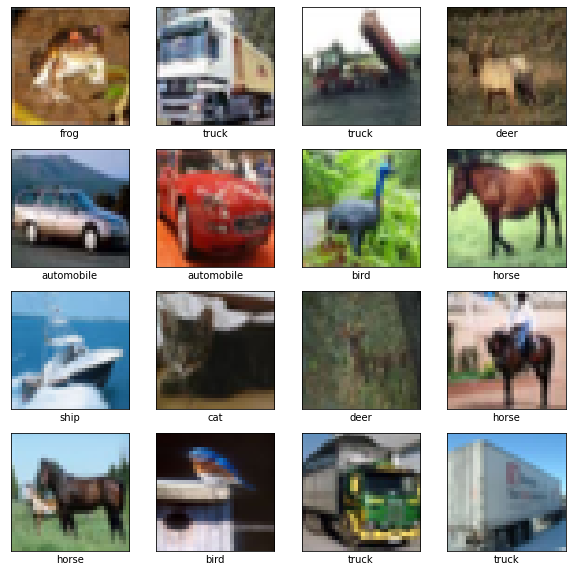

In [9]:
# plot first image from training set

plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])  # The CIFAR labels happen to be arrays,  which is why we need the extra index
plt.show() # code from https://www.tensorflow.org/tutorials/images/cnn

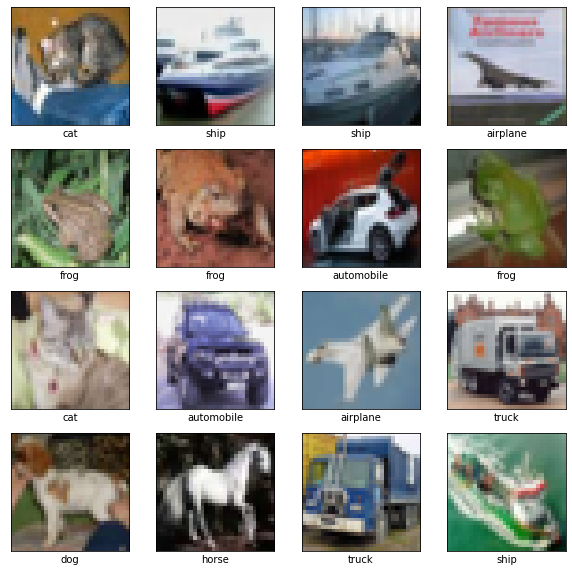

In [10]:
# plot first image from testing set

plt.figure(figsize = (10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_test[i][0]])  # The CIFAR labels happen to be arrays,  which is why we need the extra index
plt.show() # code from https://www.tensorflow.org/tutorials/images/cnn

In [11]:
# reshaping
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 3, 7, 1], dtype=uint8)

In [12]:
y_valid = y_valid.reshape(-1,)
y_valid

array([0, 6, 0, ..., 9, 1, 1], dtype=uint8)

In [13]:
# we do the same to our y_test
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [14]:
# Make sure each value is a float. (Otherwise, we get an error.)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')


In [15]:
# Normalize pixel values to be between 0 and 1
X_train /=  255.0
X_valid /= 255.0
X_test /= 255.0 # cuz 255 is the maximum possible value of any pixel

# Feature Extraction

The entire DL model works around the idea of extracting useful features that clearly define the objects in the image. Machine learning models are only as good as the features you provide. That means coming up with good features is an important job in building ML models.<br>
   >`DEFINITION`: <br>
A feature in machine learning is an individual measurable property or characteristic of an observed phenomenon. Features are the input that you feed to your ML model to output a prediction or classification. Suppose you want to predict the price of a house: your input features (properties) might include `square_foot`, `number_of_rooms`, `bathrooms`, and `so on`, and the model will output the predicted price based on the values of your features. Selecting good features that clearly distinguish your objects increases the predictive power of ML algorithms. <br> - In Computer Vision, a feature is a measurable piece of data in your image that is unique to that specific object. It may be a distinct color or a specific shape such as a line, edge, or image segment. A good feature is used to distinguish objects from one another. ([source](https://livebook.manning.com/book/grokking-deep-learning-for-computer-vision/chapter-1/161)).

**FEATURE GENERALIZABILITY**: A very important characteristic of a feature is repeatability.BUT, WHAT MAKES A GOOD FEATURE FOR OBJECT RECOGNITION? <br>
* Identifiable

* Easily tracked and compared

* Consistent across different scales, lighting conditions, and viewing angles

* Still visible in noisy images or when only part of an object is visible

## Extracting features
I like to start with an example. <br> 
Suppose we have a database of U.S presidents and we want to build a classification pipeline to tell us which president this image is of so we feed this image that we can see on the left hand side [from the above image] to our model and we wanted to output the probability that this image is of any of these particular presidents that this dataset consists of.
In order to classify these images correctly though, our pipeline needs to be able to tell what is actually unique about a picture of Abraham Lincoln vs a picture of any other president like George Washington or Jefferson, or Obama.
<div>
<img src="images/cv5.png" width="600"/>
</div>

Fig.7: Source:[Mohammed]

- **Features make pictures unique**.
Let's identify high level key features in the human, auto, and house image categories: 
<div>
<img src="images/cv6.png" width="600"/>
</div>
Fig.8: Source:[Mohammed]

## Convolution Layers
Now, suppose each feature is like a mini image; it's a patch. It's also a small 2D array of values and we'll use `filters` to pick up on the features.
>Convolution Layer:<br>
The convolution layer is where we pass a filter over an image and do some calculation at each step. Specifically, we take pixels that are close to one another, then summarize them with one number. The goal of the convolution layer is to identify important features in our images, like edges.
Source: [Here](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)


Let's  use a $3X3$ `edge-detection` filter that amplifies the edges to the image below, then this

$$\begin{bmatrix} 0 & -1 & 0 \\ -1 & 4 & -1 \\ 0 & -1 & 0\end{bmatrix}$$  `kernel` is convoluted with the input image, say $F(x,y)$, it creates a new convolved image (a feature map) that amplifies the edges (See `Fig.9` below). Zooming-in, we see `Fig.10` where a small piece of an image shows how the convolution operation is applied to get the new pixel value.





Fig.9: Applying Filter |Fig. 10: Convolution Operation Zoom-in 
:-----:|:--------:
![](images/cv7.png)| ![](images/cv8.png)
Fig.9|Fig.10

>Other filters can be applied to detect different types of features. For example, some filters detect `horizontal edges`, others detect `vertical edges`, still others detect more complex shapes like corners, and so on. The point is that these filters, when applied in the convolutional layers, yield feature-learning behavior: first they learn simple features like edges and straight lines, and later layers learn more complex features.

[source: Mohammed]

Here are the three elements that enter into the convolution operation:

* Input image
* Feature detector or `kernel`, or `filter` used interchangeably 
* Feature map
<div>
<img src="images/cv9.png" width="600"/>
</div>

Fig.11: [source](https://www.superdatascience.com/blogs/the-ultimate-guide-to-convolutional-neural-networks-cnn)

### For a 2D array convolution.


![](https://media3.giphy.com/media/i4NjAwytgIRDW/200.webp?cid=ecf05e471vftp51bx55s3lbh1el698xc1bv7l7rhy0igcpz3&rid=200.webp&ct=g)

### For a 3D array convolution 

![](img/conv.gif)

Source for the two `gif` images: [A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)


<div>
<img src="img/cnn15.png" width="600"/> 
<div>
    
fig__: [Source](https://pylessons.com/Logistic-Regression-part2)

- Putting all together:<br>
The term **`convolution`** refers to the mathematical combination of two functions to produce a third function. It merges two sets of information. In the case of a CNN, the convolution is performed on the input data with the use of a filter or kernel (these terms are used interchangeably) to then produce a feature map.

 >We perform a series `convolution + pooling operations, followed by a number of fully connected layers`. If we are performing multiclass classification the output is softmax.[fig.*source*](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2) <br>
 
![Architecture](images/architecture.png)

![CNN Architecture](images/CNN_architecture.png)

![CNN From Scratch](images/CNN_from_Scratch.png)
**Fig.13: CNN Architecture ([Source](https://www.mathworks.com/videos/introduction-to-deep-learning-what-are-convolutional-neural-networks--1489512765771.html)).**


# Non-Linearity

## Pooling

# Flattening

# Fully Connected (FC)

# SoftMax and Cross-Entroppy

In [16]:
# One-hot Encoding Targets, i.e., Change y_train to categorical
y_train =to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test =to_categorical(y_test)

In [17]:
# check size

y_train.shape

(30000, 10)

In [18]:
y_valid.shape

(20000, 10)

In [19]:

# Check y_train.
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
# let's assign: 
num_classes = y_train.shape[1]
num_classes

10

## ANN and CNN Models



In [21]:
# Build simple artificial neural network for image classification
from tensorflow.keras import datasets, layers, models

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10)



Epoch 1/10
938/938 [==============================] - 38s 40ms/step - loss: 1.8663 - accuracy: 0.3332
Epoch 2/10
938/938 [==============================] - 38s 41ms/step - loss: 1.6803 - accuracy: 0.4073
Epoch 3/10
938/938 [==============================] - 38s 40ms/step - loss: 1.5970 - accuracy: 0.4381
Epoch 4/10
938/938 [==============================] - 39s 41ms/step - loss: 1.5378 - accuracy: 0.4571
Epoch 5/10
938/938 [==============================] - 38s 41ms/step - loss: 1.4918 - accuracy: 0.4738
Epoch 6/10
938/938 [==============================] - 39s 41ms/step - loss: 1.4507 - accuracy: 0.4942
Epoch 7/10
938/938 [==============================] - 39s 42ms/step - loss: 1.4124 - accuracy: 0.5013
Epoch 8/10
938/938 [==============================] - 39s 41ms/step - loss: 1.3812 - accuracy: 0.5137
Epoch 9/10
938/938 [==============================] - 39s 41ms/step - loss: 1.3469 - accuracy: 0.5265
Epoch 10/10
938/938 [==============================] - 39s 42ms/step - loss: 1.315

You can see that at the end of 10 epochs, accuracy is at around 54%

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.evaluate(X_test, y_test)
y_pred_classes = [np.argmax(element) for element in y_pred]



313/313 [==============================] - 2s 6ms/step - loss: 1.5636 - accuracy: 0.4454


In [23]:
#print("Classification Report: \n", classification_report(y_test, y_pred_classes))

## Now let us build a convolutional neural network to train our images


In [24]:
cnn = models.Sequential([
    # first convolutional layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # second convolutional layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # fully connected classifier
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 outputs/classes
])          # softmax activation is used since we are dealing with categorical distribution

In [25]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

Before we proceed to `compile` the model, let's visualize the 3 category of layers we just created. Let's break down the following picture into our layers:
<div>
<img src="images/cv13.png" width="600"/> 
<div> 

<br>
    


Fig.15: Source-[Architecture of a CNN](https://www.mathworks.com/videos/introduction-to-deep-learning-what-are-convolutional-neural-networks--1489512765771.html)

**Here are the breakdown of `fig.15` into the three layers:**

<div>
<img src="images/cv10.png" width="600"/> 
<div> 
    
Fig.16-a: for the first convolutional layer
    
<div>
<img src="images/cv11.png" width="600"/> 
<div> 
    
Fig.16-b: for thesecond convolutional layer
    
<div>
<img src="images/cv12.png" width="600"/> 
<div> 
    
Fig.16-c: for the fully connected classifier
<br> 


picture source: [Convolutional Neural Networks](https://www.youtube.com/watch?v=AjtX1N_VT9E)

<div>
<img src="img/cnn14.png" width="600"/> 
<div>
    

Fig.17. [Source](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

In [26]:
# compile the model
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history1=cnn.fit( X_train, y_train,epochs=10,validation_data=(X_valid, y_valid), batch_size=None)


Epoch 1/10
938/938 [==============================] - 17s 17ms/step - loss: 1.5085 - accuracy: 0.4566 - val_loss: 1.3206 - val_accuracy: 0.5282
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 1.1329 - accuracy: 0.6007 - val_loss: 1.1523 - val_accuracy: 0.5976
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.9644 - accuracy: 0.6633 - val_loss: 1.0148 - val_accuracy: 0.6482
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.8473 - accuracy: 0.7042 - val_loss: 0.9706 - val_accuracy: 0.6656
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.7338 - accuracy: 0.7449 - val_loss: 0.9652 - val_accuracy: 0.6726
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.6289 - accuracy: 0.7809 - val_loss: 0.9663 - val_accuracy: 0.6771
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.5232 - accuracy: 0.8204 - val_loss: 1.0205 - val_accuracy:

With CNN, at the end 5 epochs, accuracy was at around 67% which is a significant improvement over ANN.<br> CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features.



In [28]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2520 - accuracy: 0.6713


[1.2520023584365845, 0.6712999939918518]

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.0596132e-03, 1.0336905e-03, 1.4397630e-03, 8.9105570e-01,
        3.3925031e-03, 8.8999026e-02, 2.9053877e-04, 1.9820205e-04,
        6.0536969e-03, 3.4772656e-03],
       [3.5754414e-04, 4.9268987e-02, 2.2431984e-13, 1.4528527e-09,
        1.8984166e-15, 6.5378020e-13, 1.6786199e-14, 6.7853201e-14,
        9.5027483e-01, 9.8654753e-05],
       [2.0479739e-01, 5.3312086e-02, 6.6128312e-05, 4.9033808e-04,
        3.0007728e-05, 2.8366021e-05, 6.0342836e-07, 2.5901605e-05,
        7.0414650e-01, 3.7102658e-02],
       [9.8053062e-01, 8.8548586e-03, 6.6113891e-05, 3.0645962e-05,
        1.4348865e-07, 4.6881027e-08, 9.0703868e-11, 7.8063206e-10,
        8.6888913e-03, 1.8287434e-03],
       [4.9945370e-10, 1.8162481e-06, 4.5660784e-04, 1.6889224e-02,
        9.7353441e-01, 7.2866103e-05, 9.0448847e-03, 5.3619984e-09,
        1.2037013e-07, 1.1769181e-07]], dtype=float32)

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [31]:
class_names[y_classes[3]]

'airplane'

In [32]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [33]:
# training accuracy
history1.history['accuracy'][-1], history1.history['val_accuracy'][-1]


(0.9128999710083008, 0.676800012588501)

In [36]:
# testing
evaluation = cnn.evaluate(X_test, y_test)
print(f'Test Accuracy: {round(evaluation[1]*100, 4)}%')

313/313 [==============================] - 1s 4ms/step - loss: 1.2520 - accuracy: 0.6713
Test Accuracy: 67.13%


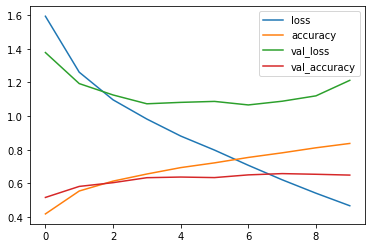

In [36]:
pd.DataFrame(history1.history).plot();

 ### 91% training accuracy and 67% `Testing` accuracy; overfitting. i.e., our model performs good on the training data set but fails to generalize on the unseen data (or testing data). <br>
I'm going to apply some regularizations to cobat the **over fitting**:
## Regularization 1: Drop Out <br>
>In dropout regularization, we randomly drop units (nodes) in our neural network during our training phase only. We assign a probability of each node disappearing. Then, we essentially perform a coinflip for every node to turn that node "on" or "off." <br>
Let's go through an example to illustrate this: For simplicity, we'll say we've assigned a 0.5 probability of keeping to every node in the network above. Then, for every node, we flip a coin, and if the coin lands on heads, the node remains, if it lands on tails, the node disappears. <br>
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif)
So, what does this do?<br>
The intuition behind dropout is that, since each node has a probability of disappearing at any time, the neural network is disincentivized from allocating too much power to any one weight. It has a similar effect as imposing an L2 penalty: the magnitude of our weights shrinks.
- Source:[ClassNote](https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/)<br>Drop out literally means we gonna drop some of the neural units randomly from our network, which forces the next layer to learn the patterns again. In this way our model will become more robust and generalizes well. Lets try to add drop out after each CNN layer + MaxPool Layer.

## Model 2 : Add Drop out

In [57]:
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25)) # Drop 25% of the units from the layer.
model2.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history2=model2.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
938/938 [==============================] - 15s 16ms/step - loss: 1.5968 - accuracy: 0.4239 - val_loss: 1.3222 - val_accuracy: 0.5322
Epoch 2/20
938/938 [==============================] - 14s 15ms/step - loss: 1.2715 - accuracy: 0.5457 - val_loss: 1.1967 - val_accuracy: 0.5807
Epoch 3/20
938/938 [==============================] - 14s 15ms/step - loss: 1.1378 - accuracy: 0.5963 - val_loss: 1.0977 - val_accuracy: 0.6140
Epoch 4/20
938/938 [==============================] - 14s 15ms/step - loss: 1.0492 - accuracy: 0.6310 - val_loss: 1.0311 - val_accuracy: 0.6430
Epoch 5/20
938/938 [==============================] - 14s 15ms/step - loss: 0.9742 - accuracy: 0.6583 - val_loss: 0.9792 - val_accuracy: 0.6686
Epoch 6/20
938/938 [==============================] - 14s 15ms/step - loss: 0.8947 - accuracy: 0.6856 - val_loss: 0.9722 - val_accuracy: 0.6651
Epoch 7/20
938/938 [==============================] - 14s 15ms/step - loss: 0.8401 - accuracy: 0.7026 - val_loss: 0.9302 - val_accuracy:

In [58]:
# training accuracy
history2.history['accuracy'][-1], history2.history['val_accuracy'][-1]

(0.8572999835014343, 0.6863499879837036)

In [59]:
evaluation = model2.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.1192 - accuracy: 0.6798
Test Accuracy: 0.6797999739646912


<AxesSubplot:>

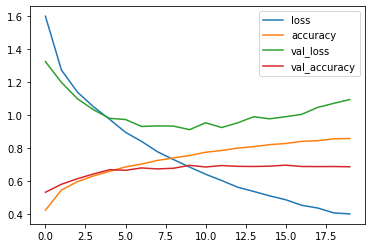

In [60]:
pd.DataFrame(history2.history).plot()

- ## Testing score went up from 65.3% to 67.98%; good improvement

## Model 3 : Add More layers with more filters.

In [62]:
model3 = Sequential()
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.4))


model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 10, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model3.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history3=model3.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid)) # Train for more number of epochs, 100

Epoch 1/50
938/938 [==============================] - 108s 115ms/step - loss: 1.7102 - accuracy: 0.3602 - val_loss: 1.4079 - val_accuracy: 0.4854
Epoch 2/50
938/938 [==============================] - 109s 116ms/step - loss: 1.3752 - accuracy: 0.4972 - val_loss: 1.2216 - val_accuracy: 0.5534
Epoch 3/50
938/938 [==============================] - 110s 117ms/step - loss: 1.2354 - accuracy: 0.5524 - val_loss: 1.1786 - val_accuracy: 0.5697
Epoch 4/50
938/938 [==============================] - 106s 113ms/step - loss: 1.1205 - accuracy: 0.5993 - val_loss: 1.0525 - val_accuracy: 0.6278
Epoch 5/50
938/938 [==============================] - 106s 114ms/step - loss: 1.0316 - accuracy: 0.6322 - val_loss: 0.9715 - val_accuracy: 0.6564
Epoch 6/50
938/938 [==============================] - 109s 116ms/step - loss: 0.9577 - accuracy: 0.6573 - val_loss: 0.9351 - val_accuracy: 0.6708
Epoch 7/50
938/938 [==============================] - 107s 114ms/step - loss: 0.8922 - accuracy: 0.6831 - val_loss: 0.9109 -

In [63]:
# training accuracy
history3.history['accuracy'][-1], history3.history['val_accuracy'][-1]

(0.9298999905586243, 0.7376999855041504)

In [64]:
evaluation = model3.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 5s 17ms/step - loss: 1.3762 - accuracy: 0.7360
Test Accuracy: 0.7360000014305115


<AxesSubplot:>

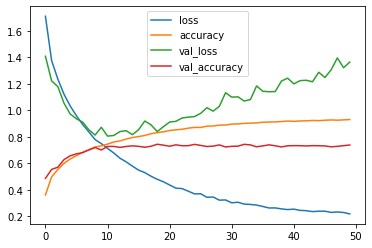

In [65]:
pd.DataFrame(history3.history).plot()

Adding more layers and increasing droup out from 0.25 to 0.4 resulted in 73.6 % accuracy which is a huge improvement, so lets try increase layers. Also don't just blindly add more layers. If you keep adding more CNN's we will lose the data as data will be reduced in size due to convolution. So when we use small size images its good idea to limit the number of layers ([source](https://www.kaggle.com/kedarsai/cifar-10-88-accuracy-using-keras)).



## Model 4: Increased layers and Filters along with Increased dropout

In [66]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.3))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model4.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history4=model4.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
938/938 [==============================] - 80s 84ms/step - loss: 1.8700 - accuracy: 0.2970 - val_loss: 1.5130 - val_accuracy: 0.4460
Epoch 2/50
938/938 [==============================] - 79s 84ms/step - loss: 1.4800 - accuracy: 0.4638 - val_loss: 1.2342 - val_accuracy: 0.5430
Epoch 3/50
938/938 [==============================] - 76s 81ms/step - loss: 1.2926 - accuracy: 0.5373 - val_loss: 1.1446 - val_accuracy: 0.5888
Epoch 4/50
938/938 [==============================] - 79s 84ms/step - loss: 1.1875 - accuracy: 0.5790 - val_loss: 1.0494 - val_accuracy: 0.6309
Epoch 5/50
938/938 [==============================] - 77s 82ms/step - loss: 1.1090 - accuracy: 0.6123 - val_loss: 0.9982 - val_accuracy: 0.6449
Epoch 6/50
938/938 [==============================] - 80s 86ms/step - loss: 1.0404 - accuracy: 0.6328 - val_loss: 0.9209 - val_accuracy: 0.6761
Epoch 7/50
938/938 [==============================] - 77s 82ms/step - loss: 0.9977 - accuracy: 0.6518 - val_loss: 0.8965 - val_accuracy:

In [67]:
# training accuracy
history4.history['accuracy'][-1], history4.history['val_accuracy'][-1]

(0.8014666438102722, 0.7806500196456909)

In [68]:
evaluation = model4.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 4s 13ms/step - loss: 0.7010 - accuracy: 0.7788
Test Accuracy: 0.7788000106811523


<AxesSubplot:>

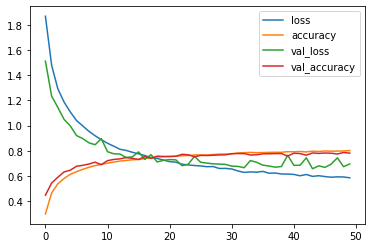

In [69]:
pd.DataFrame(history4.history).plot()

## Model 5: Adding Batch Normalization
>Batch normalization works just the same way as we normalize the input data where we divided the x_train/255. What we are trying to do there is we are arranging all the features in same scale so that model converges easily and we can reduce the distrotions. Our input layer is lucky enough to have everything in same scale why not the rest of the layers? <br>
This is what exactly we do in batch normalization, when ever we passs the CNN throuh a batch normalization layer we are normalizing the weights so that our model will be stable and we can train model longer and also use larger learning rate.<br>
Also the kind of normalization we use is batch normalization which means we compute mean and varience for each mini batch not the whole data. <br>


In [71]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model5.fit_generator(train_generator,epochs=200,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history5=model5.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid))

Epoch 1/50
938/938 [==============================] - 103s 109ms/step - loss: 1.7995 - accuracy: 0.3873 - val_loss: 1.2916 - val_accuracy: 0.5264
Epoch 2/50
938/938 [==============================] - 106s 113ms/step - loss: 1.2400 - accuracy: 0.5584 - val_loss: 0.9981 - val_accuracy: 0.6447
Epoch 3/50
938/938 [==============================] - 96s 102ms/step - loss: 1.0646 - accuracy: 0.6246 - val_loss: 0.9216 - val_accuracy: 0.6683
Epoch 4/50
938/938 [==============================] - 96s 102ms/step - loss: 0.9488 - accuracy: 0.6676 - val_loss: 0.8197 - val_accuracy: 0.7111
Epoch 5/50
938/938 [==============================] - 96s 102ms/step - loss: 0.8722 - accuracy: 0.6973 - val_loss: 0.7560 - val_accuracy: 0.7319
Epoch 6/50
938/938 [==============================] - 95s 102ms/step - loss: 0.8099 - accuracy: 0.7180 - val_loss: 0.7433 - val_accuracy: 0.7434
Epoch 7/50
938/938 [==============================] - 96s 102ms/step - loss: 0.7426 - accuracy: 0.7439 - val_loss: 0.6945 - val_

In [73]:
# training accuracy
history5.history['accuracy'][-1], history5.history['val_accuracy'][-1]

(0.9268333315849304, 0.8363000154495239)

In [74]:
evaluation = model5.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 5s 15ms/step - loss: 0.5823 - accuracy: 0.8348
Test Accuracy: 0.8348000049591064


<AxesSubplot:>

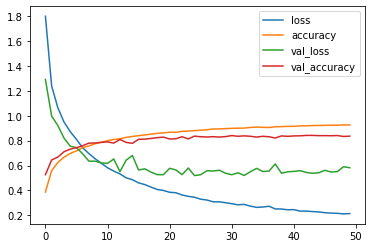

In [75]:
pd.DataFrame(history5.history).plot();

>Adding batch normalizaton yeilds very good results and we are able to get 87.3% validation accuracy. Which is really good. Batch normalization made our average results into excellent results. Still there is a lot of improvement scope. I just refered to Benchmarks.ai website and I was shocked to see 99.37. So there is defnelty a lot we can do.

## Model 6: Image augmentation
We already have 60K images and we can generate lots and lots of images out of it <br>


>See from just one image we now genearated 6 images just by changing the inclanation of the subject. Ofcourse it might looks same image for our eyes but for machine it is a different image, since the pixel values changes. We can play with color of the image, focus of the image, shift of the image etc. Image augmentation really helps machine to understand that a cat is a cat, irrespective of the color or image position. <br>
To augmet the data we are using the ImageDataGenerator of tensorflow keras preprocessing library.
[source](https://www.kaggle.com/kedarsai/cifar-10-88-accuracy-using-keras)<


In [78]:
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.2))
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.3))
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.4))
model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image Data Generator , we are shifting image accross width and height also we are flipping the image horizantally.
datagen = ImageDataGenerator(width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             horizontal_flip=True,
                             rotation_range=20)
"""
Will also try:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
# according to: https://github.com/moelgendy/deep_learning_for_vision_systems/blob/master/chapter_04/chapter_4_improve_cifar_90_percent.ipynb
"""
it_train = datagen.flow(X_train,y_train)
steps = int(X_train.shape[0] / 64)
history6=model6.fit(it_train,epochs=200,steps_per_epoch=steps,validation_data=(X_valid,y_valid))


Epoch 1/200
468/468 [==============================] - 52s 111ms/step - loss: 2.1524 - accuracy: 0.3001 - val_loss: 1.6569 - val_accuracy: 0.4051
Epoch 2/200
468/468 [==============================] - 52s 112ms/step - loss: 1.6365 - accuracy: 0.4121 - val_loss: 1.5503 - val_accuracy: 0.4679
Epoch 3/200
468/468 [==============================] - 52s 111ms/step - loss: 1.4665 - accuracy: 0.4675 - val_loss: 1.2626 - val_accuracy: 0.5526
Epoch 4/200
468/468 [==============================] - 52s 111ms/step - loss: 1.3287 - accuracy: 0.5212 - val_loss: 1.2035 - val_accuracy: 0.5658
Epoch 5/200
468/468 [==============================] - 53s 113ms/step - loss: 1.2538 - accuracy: 0.5528 - val_loss: 1.2692 - val_accuracy: 0.5658
Epoch 6/200
468/468 [==============================] - 52s 112ms/step - loss: 1.2028 - accuracy: 0.5766 - val_loss: 1.1209 - val_accuracy: 0.6209
Epoch 7/200
468/468 [==============================] - 52s 112ms/step - loss: 1.1384 - accuracy: 0.6000 - val_loss: 1.0943 -

In [79]:
# training accuracy
history6.history['accuracy'][-1], history6.history['val_accuracy'][-1]

(0.8603609800338745, 0.870199978351593)

In [80]:
evaluation = model6.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 6s 16ms/step - loss: 0.4004 - accuracy: 0.8696
Test Accuracy: 0.8695999979972839


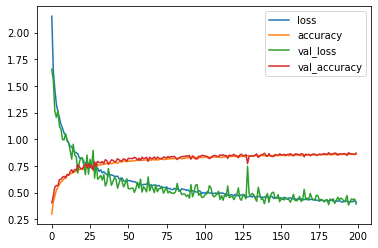

In [81]:
pd.DataFrame(history6.history).plot();

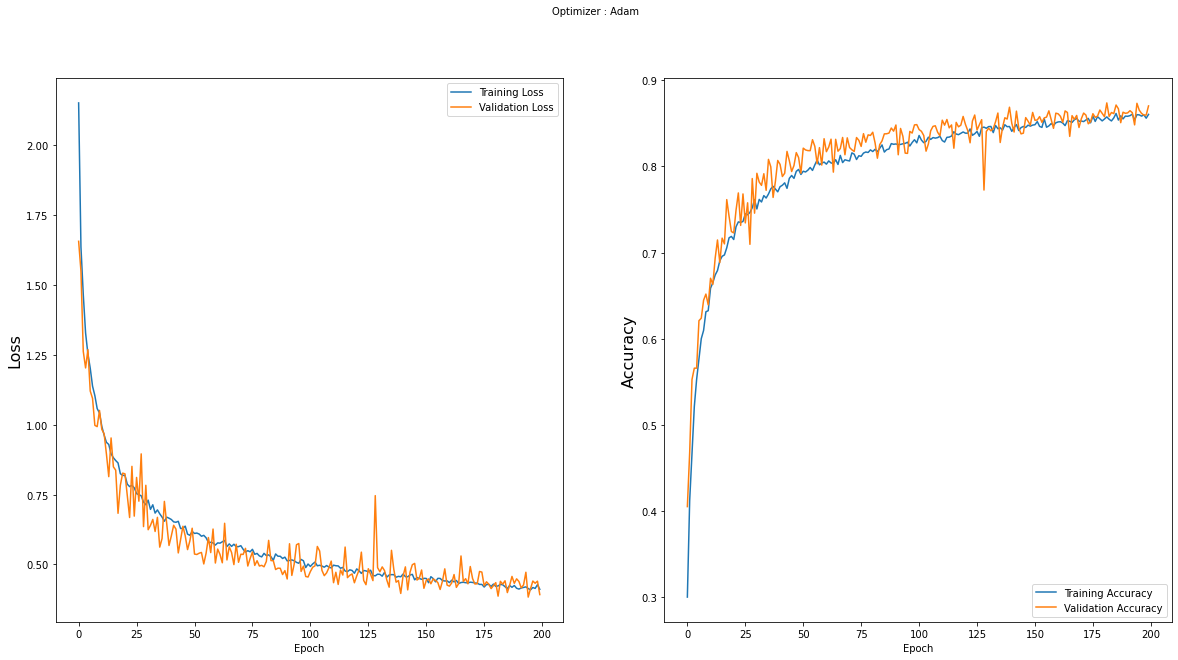

In [85]:
# plot the evolution of Loss and Acuracy on the train and validation sets

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch')
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch')
plt.plot(history6.history['accuracy'], label='Training Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show();


313/313 - 5s - loss: 0.4004 - accuracy: 0.8696 - 5s/epoch - 16ms/step


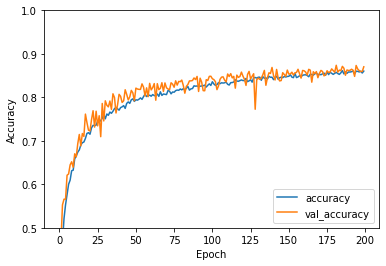

In [83]:
plt.plot(history6.history['accuracy'], label='accuracy')
plt.plot(history6.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model6.evaluate(X_test,  y_test, verbose=2)

## Save the `Best` Model

In [127]:
# saving our model
model6.save("models/bestModel.h5")

In [33]:
model = keras.models.load_model('models/bestModel.h5')


In [47]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print(f'Test accuracy is:{round(accuracy,4)}%' )


Test accuracy is:86.96%


In [48]:
# evaluation = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {round(evaluation[1],2)*100}%')

# Final Result
My `best model`, which has `86% accuracy on training` and `87% accuracy on validation` datasets, has `87% accurate on testing`. Just sticking to this `best model` of mine for now, I will make sample predictions on Testing dataset which has 10,000 images. The prediction shows the labels of the images in green color if correctely classified, and in `red color` if it fails. <br>


In [104]:
# get predictions on the test set
y_hat = model.predict(X_test)


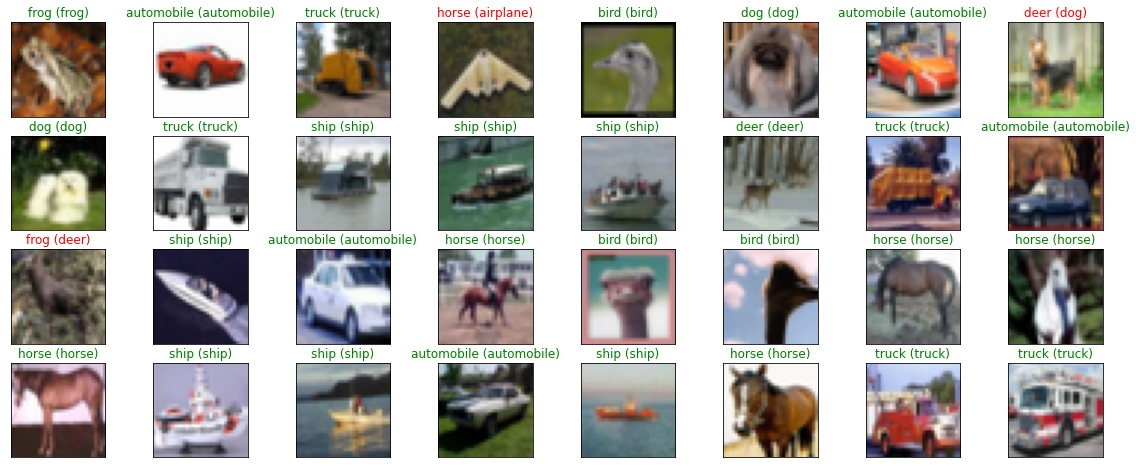

In [57]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(class_names[pred_idx], class_names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    
    # code from: https://github.com/moelgendy/deep_learning_for_vision_systems/blob/master/chapter_03/chapter_3_cifar10_cnn.ipynb

In [53]:
y_true = np.argmax(y_test, axis=1)
y_true

array([3, 8, 8, ..., 5, 1, 7])

In [54]:
y_pred_class= np.argmax(y_hat, axis=1) 
y_pred_class

array([3, 8, 8, ..., 5, 1, 7])

In [55]:
# checking misclassification
incorrect_pred_idx=np.where(y_true!=y_pred_class)[0].tolist()
len(incorrect_pred_idx)

1304

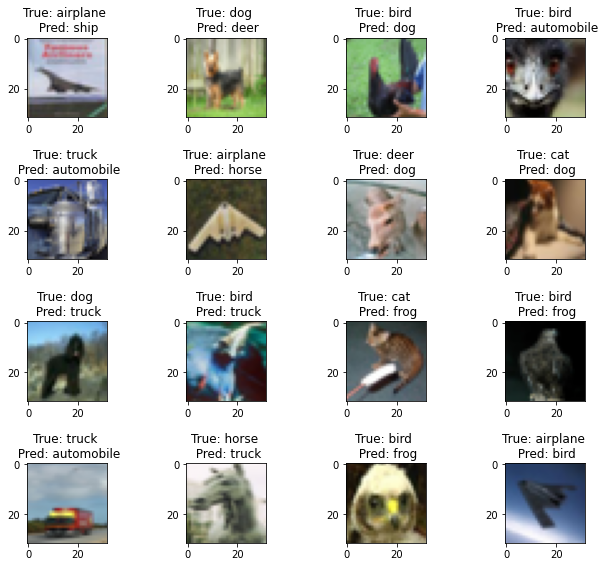

In [60]:
# sample images that are misclassified
fig,axes=plt.subplots(4,4,figsize=(10,10))
axes=axes.ravel()

for i in np.arange(0,16):
        axes[i].imshow(X_test[incorrect_pred_idx[i]])
        axes[i].set_title('True: %s \n Pred: %s'%(class_names[y_true[incorrect_pred_idx[i]]],class_names[y_pred_class[incorrect_pred_idx[i]]]))
        plt.subplots_adjust(wspace=1)

313/313 - 5s - 5s/epoch - 15ms/step


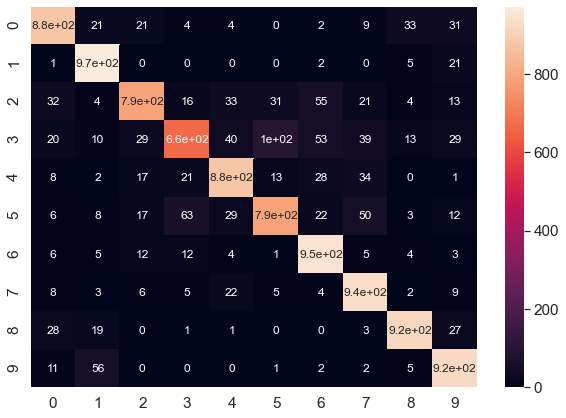

In [121]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [123]:
for i in enumerate(class_names):
    print(i)

(0, 'airplane')
(1, 'automobile')
(2, 'bird')
(3, 'cat')
(4, 'deer')
(5, 'dog')
(6, 'frog')
(7, 'horse')
(8, 'ship')
(9, 'truck')


---

---

---

References:
- E.Mohammed, Deep Learning for Vision Systems, Manning Publications Co, 2020.
- I. Goodfellow, Y. Bengio, A. Courville, Deep Learning, MIT Press, 2016.
- T. Fawcett, Pattern Recognit. Lett. 2006, 27, 861.
* [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)
* [Starting with cnn](https://www.kaggle.com/pg1007/starting-with-cnn)
* [cifar10 with CNN for beginer](https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer)
* [CIFAR 10 88% Accuracy using Keras](https://www.kaggle.com/kedarsai/cifar-10-88-accuracy-using-keras)
* [CIFAR-10 object classification Best model](https://www.kaggle.com/faizanurrahmann/cifar-10-object-classification-best-model)
* [Introduction to CNN Keras - 0.997 (top 6%)](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)
* [Convolutional Neural Network (CNN) Tutorial](https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial)
* [Python | Image Classification using Keras](https://www.geeksforgeeks.org/python-image-classification-using-keras/) from **GeeksforGeeks**
* [Image classification from scratch in keras.Image classification from scratch in keras.](https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9) †
* [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)††
* [An intuitive guide to Convolutional Neural Networks](https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050)
* [ML Glossary Documents](https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html)* [Starting with cnn](https://www.kaggle.com/pg1007/starting-with-cnn)
* [cifar10 with CNN for beginer](https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer)
* [CIFAR 10 88% Accuracy using Keras](https://www.kaggle.com/kedarsai/cifar-10-88-accuracy-using-keras)
* [CIFAR-10 object classification Best model](https://www.kaggle.com/faizanurrahmann/cifar-10-object-classification-best-model)
* [Introduction to CNN Keras - 0.997 (top 6%)](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)
* [Convolutional Neural Network (CNN) Tutorial](https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial)
* [Image classification from scratch in keras.Image classification from scratch in keras.](https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9) †
* [Applied Deep Learning - Part 4: Convolutional Neural Networks](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)††
* [An intuitive guide to Convolutional Neural Networks](https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050)
* [ML Glossary Documents](https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html)